In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data_path = "../../telecom_churn/telecom_churn.csv"
data = pd.read_csv(data_path)
data.head(10)
# data.columns

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [5]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

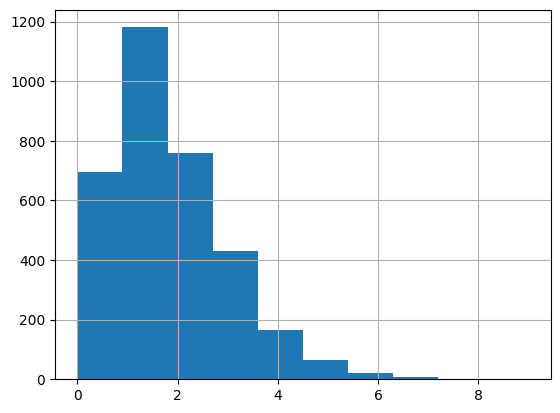

In [6]:
# Применение pandas для визуализации данных
# Pandas работает как настройка над matplotlib
data['Customer service calls'].hist();

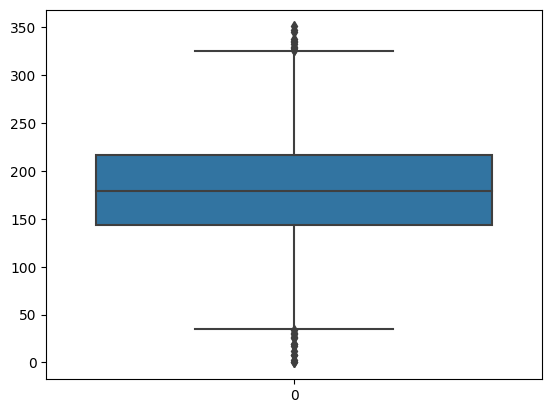

In [7]:
# использование Seaborn
# Построение диаграммы типа "ящик с усами"
# по диаграмме можно определить медиану, квартили,
# интерквартильный размах, выбросы
sns.boxplot(data['Total day minutes']);

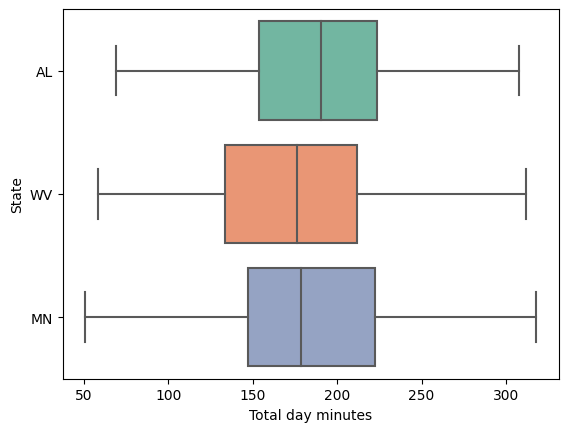

In [8]:
top_data = data[['State','Total day minutes']]
top_data = top_data.groupby('State').sum()
top_data = top_data.sort_values('Total day minutes',ascending=False)
top_data = top_data[:3].index.values
sns.boxplot(y='State', 
            x='Total day minutes', 
            data=data[data.State.isin(top_data)], palette='Set2');

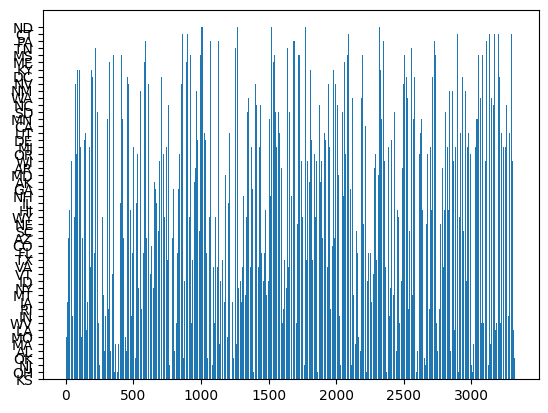

In [9]:
plt.bar(data.index, data['State'])
plt.show()

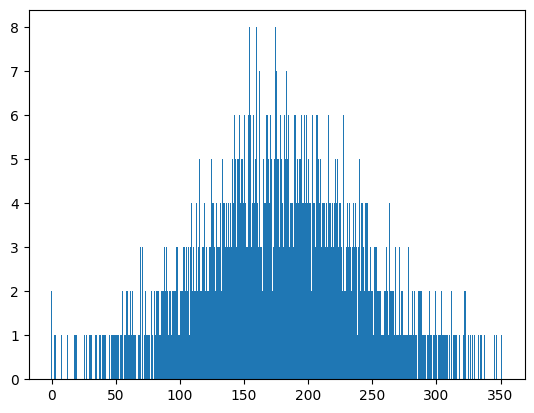

In [10]:
hist = data['Total day minutes'].value_counts()
plt.bar(hist.index, hist);

In [11]:
# jn,jh ghbpyfrjd
feats=[f for f in data.columns if 'charge' in f]
feats

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

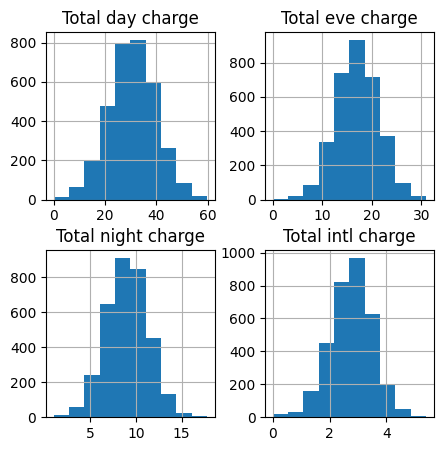

In [12]:
# построение гистограммы для нескольких признаков
data[feats].hist(figsize=(5,5));

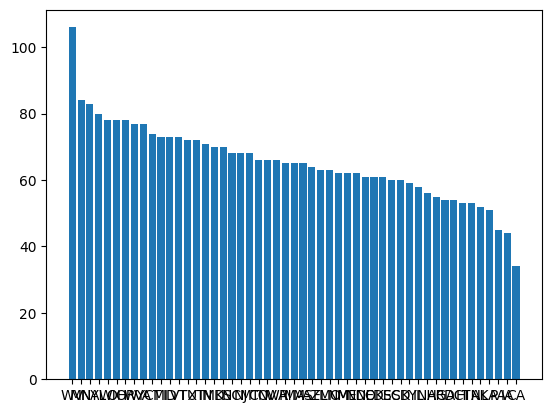

In [13]:
# определение первых n "популярных" штатов 
# data['State'].value_counts().head(10)
hist = data['State'].value_counts()
plt.bar(hist.index, hist);

In [14]:
# фактически бинарный признак
data['Churn'].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

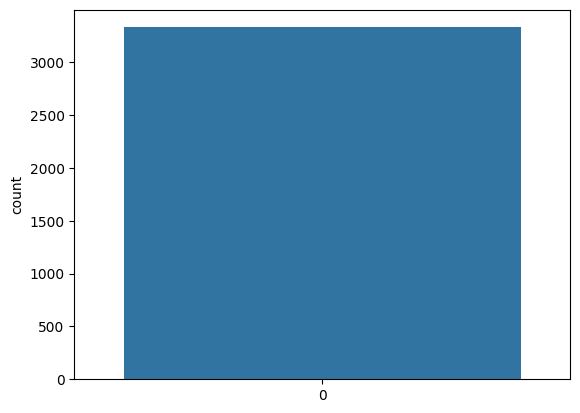

In [15]:
sns.countplot(data['Churn']);